In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

from tqdm import tqdm

40208


In [2]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print(figure_folder)
exampleCell_figure_folder = os.path.join(figure_folder, '3D_rendering')
if not os.path.exists(exampleCell_figure_folder):
    print(exampleCell_figure_folder)
    os.makedirs(exampleCell_figure_folder)

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817


In [ ]:
from matplotlib import cm
# create a color map
contact_cmap = cm.get_cmap('seismic').copy()
contact_cmap.set_bad(color=[0.5,0.5,0.5,1])

# Load result from Blair

In [3]:
# load blair's data
import pandas as pd
data_folder = r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\0814-Sample_Result_Blair'
#data_df = pd.read_hdf(os.path.join(data_folder, f'0713_SE_{fov_id}_spalign.h5'))
sel_data_files = [os.path.join(data_folder, _fl) for _fl in os.listdir(data_folder) if '.h5' in _fl]
print(sel_data_files)
data_df_list = [pd.read_hdf(_fl) for _fl in sel_data_files]

#data_df = pd.concat(data_df_list)

#data_df['x_hat'] = 2048 - data_df['x_hat']

['\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\0814-Sample_Result_Blair\\0713_SE_bulk_spalign.h5', '\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\0814-Sample_Result_Blair\\0402_SE_bulk_spalign.h5', '\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\0814-Sample_Result_Blair\\0316_SE_bulk_spalign.h5']


## load positions

In [4]:
# positions
# modify with global coordinates
position_filenames = [
    r'\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\Alignment\adjusted_translated_positions_all.txt',
    r'\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\Alignment\adjusted_translated_positions_all.txt',
    r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Alignment\adjusted_translated_positions_all.txt',
]
positions_list = [np.loadtxt(_fl, delimiter=',') for _fl in position_filenames]

## load MERFISH

In [5]:
import seaborn as sns
import anndata
import scanpy as sc

save_folder = r'\\crick\SSD_0\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
merged_adata = sc.read(os.path.join(save_folder,'new_labeled_data.h5ad'))
adata_ori = merged_adata.raw.to_adata()

print(np.unique(adata_ori.obs['experiment']))

adata_ori

['20220304' '20220329' '20220415' '20220418']


AnnData object with n_obs × n_vars = 62732 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_subclass', 'subclass_prediction_label', 'leiden_subclass_sub', 'subclass_manual_label', 'subclass_manual_label_predict', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'dendrogram_subclass_label_new', 'experiment_colors', 'leiden', 'leiden_colors', 'leiden_subclass_colors', 'leiden_subclass_sub_colors', 'neighbors', 'pca', 'scrublet', 'subclass_label_new_colors', 'subclass_manual_label_colors', 'subclass_prediction_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

## load fov-cell-exp_2_uid

In [6]:
ExpFovCell_2_uid = {}

from ImageAnalysis3.segmentation_tools.cell import Align_Segmentation
segLabel_folders = [
    r'F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Analysis_0709\Segmentation',
    r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220402-P_brain_CTP11-13_from_0329_warp\Analysis_0709\Segmentation',
    r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220316-P_brain_CTP11-12-13_from_0304\Analysis_0706\Segmentation',
]
exp_names = ['20220418', '20220329', '20220304']
for _exp, _seg_fd in zip(exp_names, segLabel_folders):
    _seg_fls = [os.path.join(_seg_fd, _fl) for _fl in os.listdir(_seg_fd) if '_Segmentation.hdf5' in _fl]
    for _fl in _seg_fls:
        # load segmentation label matrix and uids
        with h5py.File(_fl, 'r') as _f:
            for _fov_id in _f.keys():
                _fov_group = _f[list(_f.keys())[0]]
                _uid_group = _fov_group['cell_2_uid']
                for _cell_id in _uid_group.keys():
                    ExpFovCell_2_uid[(_exp, _fov_id, _cell_id)] = _uid_group[_cell_id][:][0].decode()

len(ExpFovCell_2_uid)

73889

In [ ]:
# save 
cellDf_filename = os.path.join(postanalysis_folder, 'CellDfList_3rep.pkl')

if os.path.exists(cellDf_filenamef_filename):
    cell_dfs = pickle.load(open(cellDf_filename, 'rb'))
pickle.dump(cell_dfs, open(cellDf_filename, 'wb'))

In [171]:
_fov_df[['z_hat','x_hat','y_hat']] * 0.108

,z_hat,x_hat,y_hat
7,9.853990,111.526586,131.469523
14,10.163001,112.284395,131.497484
20,9.272142,111.816819,131.105952
28,10.124837,112.413009,131.429815
34,10.026483,112.048455,130.780451
...,...,...,...
106,6.521856,75.825176,101.471081
108,6.244719,75.167894,102.493912
112,6.750985,74.983254,102.539878
117,5.894878,75.943070,102.875252


In [7]:
# save 
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
cellDf_filename = os.path.join(postanalysis_folder, 'CellDfList_3rep.pkl')

pixel_size = 108
cellType_labelName = 'subclass_label_new'

if os.path.exists(cellDf_filename):
    cell_dfs = pickle.load(open(cellDf_filename, 'rb'))
    
else:
    
    missed_cell = []
    cell_dfs = []
    for _exp, _positions, _df in zip(exp_names, positions_list, data_df_list):
        _fovs = np.unique(_df['FOV'])
        for _fov in tqdm(_fovs):
            _fov_df = _df[_df['FOV']==_fov].copy()
            # convert to micron
            _fov_df[['z_um','x_um','y_um']] = _fov_df[['z_hat','x_hat','y_hat']] * pixel_size / 1000
            # convert to global
            _fov_df[['x_um','y_um']] = _fov_df[['x_um','y_um']] + np.flipud(_positions[_fov])
            # loop through cells to re-assign cell type
            #_fov_df['replicate'] = '2022'+np.unique(_fov_df['replicate'])[0]
            _fov_df['rna_experiment'] = _exp
            # apppend
            #fov_dfs.append(_fov_df)

            # load cell
            for _cell_name in np.unique(_fov_df['orig_cellID']):

                _cell_df = _fov_df[_fov_df['orig_cellID']==_cell_name].copy()
                #_exp = np.unique(_cell_df['replicate'])[0]
                _fov = str(np.unique(_cell_df['FOV'])[0])
                _cell = _cell_name.split('Cell-')[1]
                _uid = ExpFovCell_2_uid[(_exp,_fov,_cell)]

                if not _uid in adata_ori.obs.index:
                    continue

                _cell_df['uid'] = _uid
                _cell_df['fov_id'] = _fov
                _cell_df['cell_id'] = _cell
                _cell_df['subclass'] = adata_ori.obs.loc[adata_ori.obs.index==_uid, cellType_labelName].values[0]
                cell_dfs.append(_cell_df)
    # save
    print(f"Saving: {cellDf_filename}")
    pickle.dump(cell_dfs, open(cellDf_filename, 'wb'))
    
print(len(cell_dfs))

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [03:01<00:00,  1.11s/it]


Saving: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\CellDfList_3rep.pkl
35181


## load codebook

In [8]:
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

In [9]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'

In [10]:
for _df in cell_dfs:
    if np.unique(_df['celltype'])[0] != np.unique(_df['subclass'])[0]:
        print(np.unique(_df['celltype'])[0], np.unique(_df['subclass'])[0])

SMC VLMC
Oligo OPC
Astro Oligo
Oligo OPC
Oligo OPC
Vip Sncg
Oligo OPC
L6b L6 CT
L6 IT L5 IT
L4/5 IT L6 IT
Endo Micro
Oligo OPC
L6 CT Oligo
Oligo OPC
L5 IT L6 IT
L6 CT Oligo
L4/5 IT L2/3 IT
L4/5 IT L6 IT
L6 IT Endo
L5 IT L6 IT
Oligo OPC
L5 IT L6 IT
L4/5 IT L6 IT
L6 IT L5 IT
L6 IT L2/3 IT
Sst Pvalb
L6 CT Oligo
Oligo L6 IT
L4/5 IT L6 IT
L4/5 IT L6 IT
L6 CT Oligo
L6 IT Endo
L4/5 IT L2/3 IT
L5 IT L6 IT
L6 CT Oligo
Micro OPC
L4/5 IT L6 IT
L6 IT L5 IT
L5 IT L6 IT
Sst L5 IT
L5 IT L6 IT
Peri SMC
Sst Pvalb
L5 IT L4/5 IT
L6 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
Endo SMC
L5 IT L4/5 IT
Oligo OPC
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT Oligo
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L4/5 IT Oligo
L4/5 IT L2/3 IT
Astro L4/5 IT
L4/5 IT Oligo
L4/5 IT L2/3 IT
L4/5 IT L2/3 IT

OPC Astro
Astro Oligo
Astro Oligo
L6 CT Oligo
Astro Oligo
Astro Oligo
Sst Oligo
Oligo Lamp5
L6 CT Astro
Oligo OPC
Astro Oligo
Oligo OPC
Oligo OPC
L2/3 IT Astro
L6b Astro
L6 CT Oligo
L6 CT Oligo
Oligo OPC
L6 CT Pvalb
Oligo OPC
L6 CT Oligo
L6 CT Oligo
L6 CT Oligo
L6 CT Oligo
L6 CT Oligo
L6 CT Oligo
L6 CT Oligo
L6 CT Oligo
L6 CT Oligo
Sst Oligo
L6 CT Oligo
Sst Oligo
Oligo OPC
L6 CT Oligo
L5 IT L6 IT
Endo Pvalb
Lamp5 Vip
L6 CT Oligo
Oligo OPC
Astro L5 ET
Oligo OPC
Oligo Peri
L5 IT L6 IT
L5 IT L6 IT
Peri Endo
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 ET L5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
Pvalb Sst
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
Lamp5 Vip
L5 IT L4/5 IT
Oligo OPC
L2/3 IT L4/5 IT
Peri SMC
L4/5 IT L2/3 IT
L4/5 IT Oligo
L5 IT L4/5 IT
L5 IT L4/5 IT
Endo L5 IT
L4/5 IT L2/3 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
Lamp5 other
L5 IT L4/5 IT
Endo Micro
L4/5 IT L2/3 IT
L5 IT L4/5 IT
Lamp5 Vip
L5 IT L4/5 IT
L4/5 IT L2/3 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L4/5 IT L2/3 IT
Endo other
OPC other
Endo other
A

Lamp5 other
Lamp5 other
L2/3 IT L5 IT
Lamp5 other
Vip Lamp5
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L4/5 IT L2/3 IT
L4/5 IT L2/3 IT
L5 IT L4/5 IT
L4/5 IT L2/3 IT
L5 IT L4/5 IT
L2/3 IT L4/5 IT
L4/5 IT L2/3 IT
L5 IT L4/5 IT
L4/5 IT L2/3 IT
Oligo OPC
L4/5 IT L2/3 IT
OPC L5 ET
L5 IT L4/5 IT
L5 IT other
L5 IT L4/5 IT
L5 IT L4/5 IT
OPC other
L5 IT L4/5 IT
Oligo OPC
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
Micro Endo
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5/6 NP L6 CT
Oligo OPC
Oligo OPC
Astro L5 ET
Oligo OPC
Endo Micro
Oligo OPC
L5/6 NP L6 CT
Sst Pvalb
Pvalb L6 IT
Sncg Astro
L6b Astro
Oligo OPC
Oligo OPC
Astro Oligo
Oligo OPC
Oligo OPC
Oligo OPC
Astro Oligo
Astro Oligo
Astro OPC
Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
Astro Oligo
Oligo OPC
L5 IT Astro
Oligo OPC
Astro Oligo
Oligo OPC
Astro Micro
Endo Astro
Oligo OPC
Oligo OPC
Oligo OPC
L6 CT Oligo
Micro L6 CT
Oligo OPC
L5/6 NP L6 CT
Oligo OPC
L5 IT L6 IT
Oligo OPC
L5 IT L6 IT
L4/5 IT L5 IT
L4/5

L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
Oligo OPC
L5 IT L4/5 IT
L5 IT L4/5 IT
Lamp5 Vip
Astro L5 ET
Oligo OPC
Oligo OPC
Oligo OPC
Micro Endo
Oligo OPC
Oligo OPC
Sst other
L4/5 IT L2/3 IT
Oligo OPC
L5 IT Pvalb
Sst Oligo
Endo VLMC
Astro OPC
L5/6 NP L6 CT
Oligo OPC
Oligo OPC
L5/6 NP L6 CT
Oligo OPC
Sst Micro
Oligo OPC
L5/6 NP L6 CT
Astro L5 IT
L5/6 NP L6 CT
Peri Endo
Oligo OPC
L6 IT Astro
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 ET OPC
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
L5 IT L4/5 IT
Micro Endo
Astro L5 ET
Oligo OPC
L5/6 NP Endo
L5 IT L6 IT
L5 IT L6 IT
Oligo OPC
L5 IT L6 IT
Lamp5 Vip
L5/6 NP L6 CT
Oligo OPC
L5/6 NP L6 CT
Lamp5 Micro
Oligo OPC
Oligo OPC
Oligo OPC
Micro L5 ET

Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
VLMC other
OPC other
Oligo other
Endo other
Oligo other
Astro other
OPC other
L5 ET L2/3 IT
L2/3 IT other
L2/3 IT other
Endo other
L2/3 IT other
L2/3 IT other
L2/3 IT other
L2/3 IT other
L2/3 IT other
L2/3 IT other
L2/3 IT other
L2/3 IT other
Oligo L5 ET
L2/3 IT other
L2/3 IT other
L2/3 IT other
Endo other
Micro Astro
Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
L2/3 IT other
L2/3 IT other
L2/3 IT other
L2/3 IT other
Astro Oligo
L2/3 IT other
Oligo OPC
Oligo OPC
Oligo OPC
Astro Oligo
Oligo OPC
Oligo OPC
Astro Oligo
Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
Oligo OPC
L5/6 NP L6 CT
Oligo OPC
Oligo OPC
L5/6 NP L6 CT
Sst Astro
L6 CT Oligo
L5/6 NP L6 CT
L5/6 NP L6 CT
Oligo OPC


## Convert to chr_2_zxys and save

In [11]:
sel_cols = ['rna_experiment', 'uid', 'fov_id', 'cell_id', 'subclass',
            'chr', 'hyb', 'fiberidx', 'numfiber',
            'center_intensity', 'z_um', 'x_um', 'y_um', 
            ]
sel_merged_df = pd.concat([_df[sel_cols] for _df in cell_dfs])

In [12]:
sel_merged_filename = os.path.join(postanalysis_folder, 'selected_all_cells.csv')
if not os.path.exists(sel_merged_filename):
    sel_merged_df.to_csv(sel_merged_filename, index=False)

In [13]:
import multiprocessing as mp

In [14]:
from ImageAnalysis3.io_tools.aligner import spAligner_2_chr2homologList

In [19]:
len(cell_dfs)

35181

In [23]:
%timeit

In [18]:
%time
num_threads = 44
with mp.Pool(num_threads) as aligner_pool:
    align_results = aligner_pool.starmap(spAligner_2_chr2homologList, [(_cell_df, codebook) for _cell_df in cell_dfs])
    aligner_pool.close()
    aligner_pool.join()
    aligner_pool.terminate()
len(align_results)

Wall time: 0 ns


In [21]:
chr2ZxysList = [_r[0] for _r in align_results]
cellInfoList = [_r[1] for _r in align_results]

In [25]:
chr2Zxys_filename = os.path.join(postanalysis_folder, 'all_chr2Zxys.pkl')
if not os.path.exists(chr2Zxys_filename):
    print(f"Saving: {chr2Zxys_filename}")
    pickle.dump(chr2ZxysList, open(chr2Zxys_filename, 'wb'))
    
cellInfo_filename = os.path.join(postanalysis_folder, 'all_cellInfo.pkl')
if not os.path.exists(cellInfo_filename):
    print(f"Saving: {cellInfo_filename}")
    pickle.dump(cellInfoList, open(cellInfo_filename, 'wb'))

Saving: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\all_chr2Zxys.pkl
Saving: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\all_cellInfo.pkl


## partition by subclass

In [26]:
subclass_2_chr2ZxysList = {}
subclass_2_cellInfoList = {}
for _info, _chr2Zxys in zip(cellInfoList, chr2ZxysList):
    _cls = _info['subclass']
    if _cls not in subclass_2_chr2ZxysList:
        subclass_2_chr2ZxysList[_cls] = [_chr2Zxys]
        subclass_2_cellInfoList[_cls] = [_info]
    else:
        subclass_2_chr2ZxysList[_cls].append(_chr2Zxys)
        subclass_2_cellInfoList[_cls].append(_info)

In [27]:
for _cls in subclass_2_chr2ZxysList:
    print(_cls, len(subclass_2_chr2ZxysList[_cls]))

Oligo 4765
L6b 741
Astro 3822
VLMC 444
OPC 1568
Endo 2891
L6 CT 4234
Peri 738
Micro 1523
L6 IT 1837
Sncg 133
L2/3 IT 3095
Sst 746
L5 IT 2014
Vip 357
Pvalb 993
Lamp5 339
L5/6 NP 596
L5 ET 1202
L4/5 IT 2398
SMC 434
other 311


In [28]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
if not os.path.exists(subclass_2_chr2Zxys_filename):
    print(f"Saving: {subclass_2_chr2Zxys_filename}")
    pickle.dump(subclass_2_chr2ZxysList, open(subclass_2_chr2Zxys_filename, 'wb'))
    
subclass_2_cellInfo_filename = os.path.join(postanalysis_folder, 'subclass_2_cellInfo.pkl')
if not os.path.exists(subclass_2_cellInfo_filename):
    print(f"Saving: {subclass_2_cellInfo_filename}")
    pickle.dump(subclass_2_cellInfoList, open(subclass_2_cellInfo_filename, 'wb'))

Saving: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\subclass_2_chr2Zxys.pkl
Saving: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\subclass_2_cellInfo.pkl


In [32]:
subclass_2_median_filename = os.path.join(postanalysis_folder, 'subclass_2_medianDict.pkl')
print(subclass_2_median_filename)

if os.path.exists(subclass_2_median_filename):
    print("Loading")
    subclass_2_medianDict = np.load(subclass_2_median_filename, allow_pickle=True)
else:
    from ImageAnalysis3.structure_tools.distance import Chr2ZxysList_2_summaryDist_by_key,Chr2ZxysList_2_summaryDict
    # calculate prob
    subclass_2_medianDict = {}
    for _subclass in subclass_2_chr2ZxysList:
        subclass_2_medianDict[_subclass] = Chr2ZxysList_2_summaryDict(
            subclass_2_chr2ZxysList[_subclass], 
            total_codebook=codebook, 
            num_threads=44, verbose=True)
    
    print(f"Saving to: {subclass_2_median_filename}")
    pickle.dump(subclass_2_medianDict, open(subclass_2_median_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\subclass_2_medianDict.pkl
-- preparing chr_2_zxys from 4765 cells in 3.786s.
-- summarize 231 inter-chr distances with 44 threads in 683.583s.
-- preparing chr_2_zxys from 741 cells in 0.158s.
-- summarize 231 inter-chr distances with 44 threads in 112.777s.
-- preparing chr_2_zxys from 3822 cells in 3.287s.
-- summarize 231 inter-chr distances with 44 threads in 309.287s.
-- preparing chr_2_zxys from 444 cells in 0.091s.
-- summarize 231 inter-chr distances with 44 threads in 69.294s.
-- preparing chr_2_zxys from 1568 cells in 1.508s.
-- summarize 231 inter-chr distances with 44 threads in 160.272s.
-- preparing chr_2_zxys from 2891 cells in 1.989s.
-- summarize 231 inter-chr distances with 44 threads in 260.430s.
-- preparing chr_2_zxys from 4234 cells in 4.317s.
-- summarize 231 inter-chr distances with 44 threads in 343.990s.
-- preparing chr_2_zxys from 738 cells in 1.259s.
-- summarize 231 inter-chr distances w

<IPython.core.display.Javascript object>


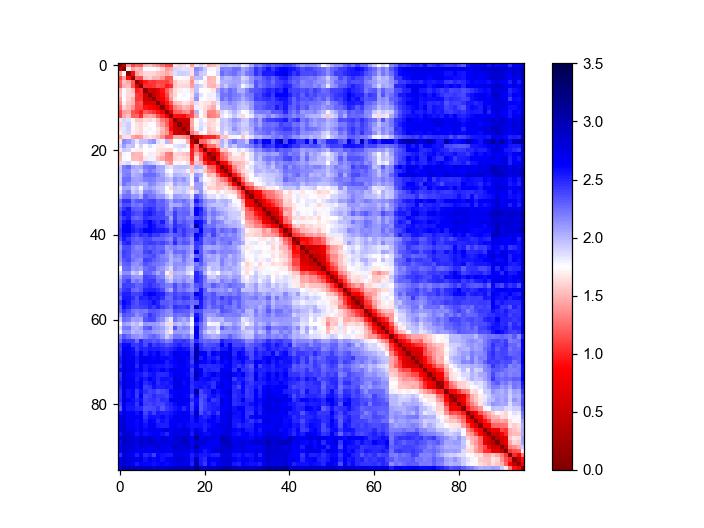

In [36]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
_pf = ax.imshow(subclass_2_medianDict['L6 CT'][('cis_7')], vmin=0, vmax=3.5, cmap='seismic_r')
plt.colorbar(_pf)

In [41]:
ensemble_median_filename = os.path.join(postanalysis_folder, 'ensemble_medianDict.pkl')
print(ensemble_median_filename)

if os.path.exists(ensemble_median_filename):
    print("Loading")
    ensemble_medianDict = np.load(ensemble_median_filename, allow_pickle=True)

else:
    # summarize all zxy_dicts
    all_zxys_dicts = []
    for _subclass, _zxysDicts in subclass_2_chr2ZxysList.items():
        all_zxys_dicts.extend(_zxysDicts)
    ensemble_medianDict = Chr2ZxysList_2_summaryDict(
        all_zxys_dicts, 
        total_codebook=codebook, 
        parallel=True,
        num_threads=12, verbose=True) # change to 8 threads because running 44 threads directly crashed RAM
    print(f"Saving to: {ensemble_median_filename}")
    pickle.dump(ensemble_medianDict, open(ensemble_median_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\ensemble_medianDict.pkl
-- preparing chr_2_zxys from 35181 cells in 31.213s.
-- summarize 231 inter-chr distances with 12 threads in 2417.388s.
Saving to: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\ensemble_medianDict.pkl


<IPython.core.display.Javascript object>


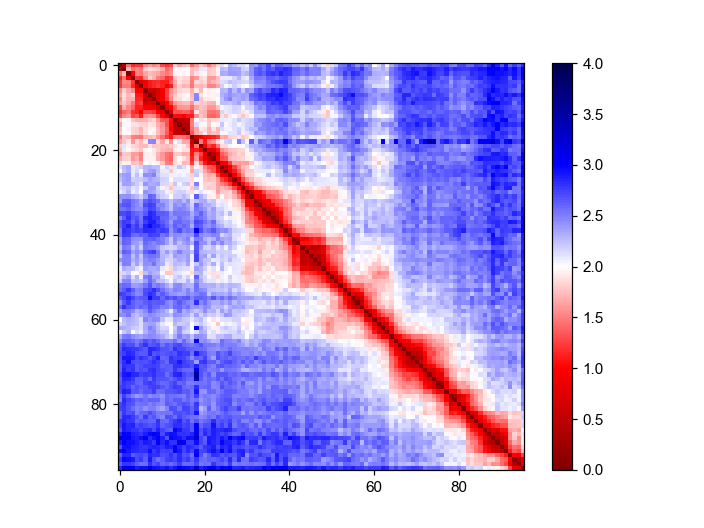

In [43]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
_pf = ax.imshow(subclass_2_medianDict['L2/3 IT'][('cis_7')], vmin=0, vmax=4, cmap='seismic_r')
plt.colorbar(_pf)

In [3]:
fov_id = 2

In [6]:
folders, fovs = ia.io_tools.data.get_folders(r'\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418')

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 78
- Number of field of views: 200


In [28]:
segLabel_filename = os.path.join(r'F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418',
                                 'Analysis_0709', 'Segmentation', fovs[fov_id].replace('.dax','_Segmentation.hdf5'))
print(segLabel_filename)
with h5py.File(segLabel_filename, 'r') as _f:
    segLabels = _f[str(fov_id)]['dna_mask'][:]
transSegLabels = np.flip(segLabels.transpose((0,2,1)),axis=(2,))

F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Analysis_0709\Segmentation\Conv_zscan_002_Segmentation.hdf5


In [29]:
ref_export_file = os.path.join(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export', 
                               f'Decoded_Fov-{fov_id}.hdf5')

with h5py.File(ref_export_file, 'r') as _f:
    print(_f.keys())
    ref_cell_ids = list(_f.keys())
ref_cell_ids = [int(_n.split('-')[1]) for _n in ref_cell_ids]

<KeysViewHDF5 ['Cell-100', 'Cell-101', 'Cell-102', 'Cell-103', 'Cell-104', 'Cell-105', 'Cell-106', 'Cell-107', 'Cell-108', 'Cell-109', 'Cell-11', 'Cell-111', 'Cell-112', 'Cell-113', 'Cell-115', 'Cell-117', 'Cell-118', 'Cell-119', 'Cell-12', 'Cell-120', 'Cell-121', 'Cell-123', 'Cell-124', 'Cell-126', 'Cell-127', 'Cell-129', 'Cell-13', 'Cell-130', 'Cell-132', 'Cell-134', 'Cell-135', 'Cell-136', 'Cell-137', 'Cell-14', 'Cell-141', 'Cell-15', 'Cell-150', 'Cell-17', 'Cell-18', 'Cell-19', 'Cell-20', 'Cell-21', 'Cell-22', 'Cell-23', 'Cell-24', 'Cell-25', 'Cell-27', 'Cell-28', 'Cell-29', 'Cell-31', 'Cell-32', 'Cell-33', 'Cell-35', 'Cell-36', 'Cell-37', 'Cell-38', 'Cell-39', 'Cell-4', 'Cell-40', 'Cell-43', 'Cell-45', 'Cell-46', 'Cell-47', 'Cell-48', 'Cell-50', 'Cell-51', 'Cell-52', 'Cell-54', 'Cell-55', 'Cell-56', 'Cell-57', 'Cell-58', 'Cell-59', 'Cell-6', 'Cell-60', 'Cell-61', 'Cell-63', 'Cell-64', 'Cell-65', 'Cell-66', 'Cell-67', 'Cell-7', 'Cell-75', 'Cell-76', 'Cell-78', 'Cell-80', 'Cell-82',

In [42]:
fov_dfs = []
for _positions, _df in zip(positions_list, data_df_list):
    _fovs = np.unique(_df['FOV'])
    for _fov in _fovs:
        _fov_df = _df[_df['FOV']==_fov].copy()
        # convert to micron
        _fov_df[['z_um','x_um','y_um']] = _fov_df[['z_hat','x_hat','y_hat']] / pixel_size
        # convert to global
        _fov_df[['x_um','y_um']] = _fov_df[['x_um','y_um']] + np.flipud(_positions[_fov])
        # loop through cells to re-assign cell type
        _fov_df['replicate'] = '2022'+np.unique(_fov_df['replicate'])[0]
        # apppend
        fov_dfs.append(fov_dfs)
        break
    break

In [45]:
adata_ori.obs

,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y,experiment,n_genes_by_counts,...,predicted_doublet,leiden,leiden_subclass,subclass_prediction_label,leiden_subclass_sub,subclass_manual_label,subclass_manual_label_predict,subclass_label_new,class_label_new,neuron_identity
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
103489270985795086009915676188840872439,0,403.121799,-5984.643199,3962.926100,-5989.562599,-5979.723799,3956.597300,3969.254901,20220304,27,...,False,2,2,Astro,2,Astro,Astro,Astro,Astro,Non-Neuronal
113811790893231448949429397438012891173,0,1345.443053,-6046.845801,3943.378100,-6056.090601,-6037.601000,3938.129300,3948.626900,20220304,52,...,False,10,10,Oligo,10,other,Oligo,other,other,other
119547840309256440899855144626134392385,0,866.273544,-6009.207800,3915.406099,-6014.078600,-6004.337000,3910.049299,3920.762899,20220304,33,...,False,10,10,L6b,10,other,L6b,other,other,other
120849314423504941338008541020153695260,0,1186.181156,-6114.885802,3938.572100,-6122.942603,-6106.829002,3933.377300,3943.766900,20220304,71,...,False,10,10,Micro,10,other,Micro,other,other,other
125550627244524118102850004242680097855,0,281.811702,-6190.485804,3985.876101,-6194.546605,-6186.425004,3981.869301,3989.882901,20220304,14,...,False,8,8,Peri,"8,0",Peri,Peri,Peri,Peri,Non-Neuronal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216743509822996359971425086529065233172,199,1524.797824,756.829978,-466.464022,746.181177,767.478778,-473.224822,-459.703222,20220418,27,...,False,10,10,Micro,10,other,Micro,other,other,other
235791795914903367868231154493525204064,199,1391.762666,811.045979,-394.590020,804.285179,817.806779,-401.944821,-387.235220,20220418,19,...,False,10,10,Endo,10,other,Endo,other,other,other
281137009595534032327996677664017059078,199,1145.897197,816.877979,-425.208021,810.981179,822.774779,-432.076821,-418.339221,20220418,22,...,False,10,10,PVM,10,other,PVM,other,other,other


In [ ]:
len(modified_df)

In [43]:
_fov_df

,FOV,replicate,finalcellID,celltype,chr,start,end,hyb,x_hat,y_hat,...,num_spots,uindex,rowID,Score,fiberidx,numfiber,orig_cellID,z_um,x_um,y_um
5,0,20220713,0,Oligo,chr1,9627926,9637875,3,1947.769918,1208.513400,...,2,1016,5,3069.883328,1,2,Cell-102,0.670980,220.764907,347.589939
11,0,20220713,0,Oligo,chr1,13741888,13757922,6,1945.535535,1213.309800,...,3,4,11,3069.883328,1,2,Cell-102,0.684715,220.744218,347.634350
13,0,20220713,0,Oligo,chr1,16251322,16259969,7,1951.600635,1212.612800,...,3,5,13,3069.883328,1,2,Cell-102,0.665131,220.800376,347.627896
15,0,20220713,0,Oligo,chr1,20920666,20929358,9,1946.805169,1198.305850,...,2,1018,15,3069.883328,1,2,Cell-102,0.692193,220.755974,347.495425
16,0,20220713,0,Oligo,chr1,21249750,21259997,10,1944.218868,1193.891700,...,3,7,16,3069.883328,1,2,Cell-102,0.603141,220.732027,347.454553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0,20220713,70,L6b,chrX,156242675,156257265,56,592.938152,1701.726867,...,3,981,269334,2503.649096,1,1,Cell-90,0.790122,208.220168,352.156730
69,0,20220713,70,L6b,chrX,158749404,158759978,57,588.870949,1700.826600,...,3,982,269335,2503.649096,1,1,Cell-90,0.762054,208.182509,352.148394
74,0,20220713,70,L6b,chrX,167157164,167167452,61,597.938949,1702.634300,...,3,1980,269340,2503.649096,1,1,Cell-90,0.903233,208.266472,352.165132
77,0,20220713,70,L6b,chrX,168746045,168757590,62,594.112364,1693.957850,...,2,986,269343,2503.649096,1,1,Cell-90,0.768771,208.231040,352.084795


In [20]:
positions_list[0].shape

(200, 2)

In [17]:
_fovs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  18,  19,  20,  21,  22,  23,  24,  26,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,  81,  84,
        91,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120,
       122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149,
       150, 151, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 198], dtype=int64)

In [4]:
_fov_df = data_df[data_df['FOV']==1]

<IPython.core.display.Javascript object>


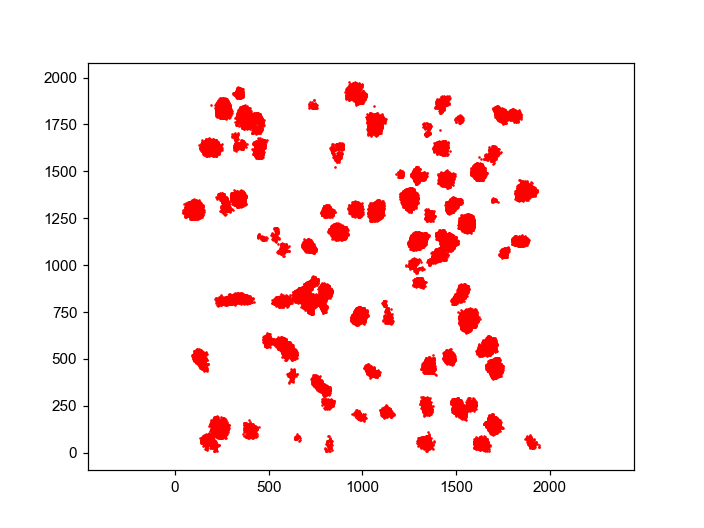

(-53.004121249999926, 2035.97444625, -91.42577159749999, 2075.9289024474997)

In [5]:
plt.figure()
#plt.imshow(transSegLabels.max(0))
plt.scatter(_fov_df['x_hat'], _fov_df['y_hat'],s=0.5, c='red')
plt.axis('equal')

<IPython.core.display.Javascript object>


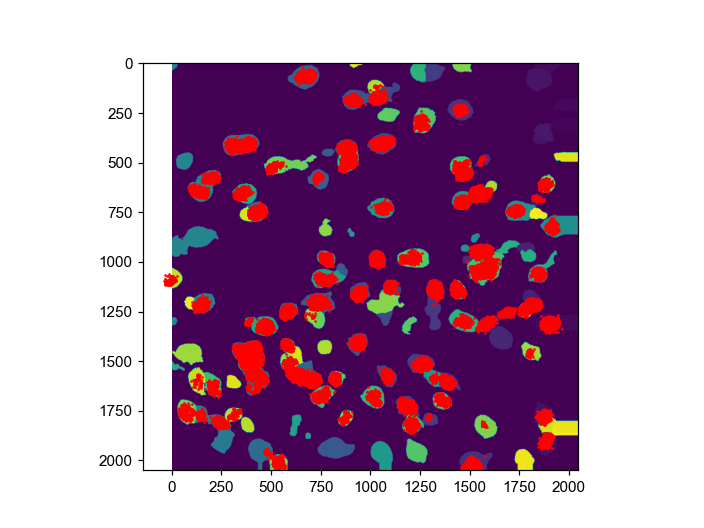

In [45]:
plt.figure()
plt.imshow(transSegLabels.max(0))
plt.scatter(data_df['x_hat'], data_df['y_hat'],s=0.5, c='red')


In [11]:
from skimage.measure import find_contours

cell_id = 33 # 96

vertices = (find_contours((transSegLabels==cell_id).max(0))[0])

xs, ys = np.where((transSegLabels==cell_id).any(0))

In [47]:
_flt = (data_df['y_hat'] > min(xs)) & (data_df['y_hat'] < max(xs)) & (data_df['x_hat'] > min(ys)) & (data_df['x_hat'] < max(ys))
data_df[_flt]

,FOV,replicate,finalcellID,celltype,chr,start,end,hyb,x_hat,y_hat,...,sig_z,center_intensity,center_internal_dist,codebook_name,num_spots,uindex,rowID,Score,fiberidx,numfiber
3,2,0713,214,Oligo,chr1,3742742,3759944,0,1061.099800,429.859010,...,1,1910.169500,138.543642,CTP11,2,0,737819,2233.125467,1,3
8,2,0713,214,Oligo,chr1,6245958,6258969,1,1056.636547,427.994713,...,1,3487.433400,23.942182,CTP11,3,1,737824,2233.125467,1,3
13,2,0713,214,Oligo,chr1,8740008,8759916,2,1052.821280,425.165390,...,1,1067.333480,223.863391,CTP11,2,2,737829,2233.125467,1,3
17,2,0713,214,Oligo,chr1,9799472,9811359,4,1057.302657,425.557383,...,1,2546.132367,159.154510,CTP13,3,1017,737833,2233.125467,1,3
22,2,0713,214,Oligo,chr1,13741888,13757922,6,1052.235833,429.700227,...,1,1954.142700,127.556992,CTP11,3,4,737838,2233.125467,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2,0713,214,Oligo,chrX,151244970,151259694,54,1071.859620,401.906573,...,1,1728.680700,34.370134,CTP11,3,979,746161,3188.870307,1,1
127,2,0713,214,Oligo,chrX,153743904,153759903,55,1067.800355,393.331640,...,1,1104.928170,208.742370,CTP11,2,980,746167,3188.870307,1,1
132,2,0713,214,Oligo,chrX,158749404,158759978,57,1071.564750,396.014970,...,1,1558.580200,185.842007,CTP11,2,982,746172,3188.870307,1,1
140,2,0713,214,Oligo,chrX,163750534,163758706,59,1094.015333,415.002197,...,1,2105.144500,208.613888,CTP11,3,984,746180,3188.870307,1,1


In [58]:
cell_data_df.columns

Index(['FOV', 'replicate', 'finalcellID', 'celltype', 'chr', 'start', 'end',
       'hyb', 'x_hat', 'y_hat', 'z_hat', 'sig_x', 'sig_y', 'sig_z',
       'center_intensity', 'center_internal_dist', 'codebook_name',
       'num_spots', 'uindex', 'rowID', 'Score', 'fiberidx', 'numfiber'],
      dtype='object')

In [51]:
np.unique(data_df[_flt]['finalcellID'])

array([214], dtype=int64)

In [52]:
cell_data_df = data_df[_flt]

In [95]:
default_infoNames = ['FOV', 'replicate', 'finalcellID', 'celltype']
def spAligner_2_chr2homologList(cell_data_df, codebook, voxel_size=108, 
                                info_names=default_infoNames,
                                fill_blank=True):
    # init
    chr_2_homologList = {}
    # loop through chrs 
    for _chr_name in np.unique(cell_data_df['chr']):
        if 'chr' in _chr_name:
            _chr = _chr_name.split('chr')[1]
        else:
            _chr = _chr_name
        # sel chr codebook
        _chr_codebook = codebook[codebook['chr']==_chr]
        # search chr
        _chr_df = cell_data_df[cell_data_df['chr']==_chr_name]
        # init homologs
        _homologs = []
        for _i_fbr in np.unique(_chr_df['fiberidx']):
            _fbr_df = _chr_df[_chr_df['fiberidx']==_i_fbr].copy().sort_values('hyb')
            _inds = _fbr_df['hyb'].values
            _coords = _fbr_df[['z_hat', 'x_hat', 'y_hat']].values * float(voxel_size)
            if fill_blank:
                _full_coords = np.ones([len(_chr_codebook),3]) * np.nan
                _full_coords[_inds] = _coords
                _homologs.append(_full_coords)
            else:
                _homologs.append(_coords)
        # append
        chr_2_homologList[_chr] = _homologs
    # summary info_dict
    info_dict = {}
    for _n in info_names:
        info_dict[_n] = np.unique(cell_data_df[_n])[0]
        
    return chr_2_homologList, info_dict

chr_2_zxys, info_dict = spAligner_2_chr2homologList(cell_data_df, codebook)


In [283]:
def Merge_Chr2ZxysList(chr_2_zxys_list,):
    from ImageAnalysis3.structure_tools.distance import sort_chr
    # init
    full_zxys_list = []
    full_chr_ids = []
    full_homolog_ids = []
    # collect
    for _chr in list(sorted(chr_2_zxys_list.keys(), key = lambda v:sort_chr(v))):
        full_zxys_list.extend(list(chr_2_zxys_list[_chr]))
        for _ih, _zxys in enumerate(chr_2_zxys_list[_chr]):
            full_chr_ids.append(np.array([_chr]*len(_zxys)))
            full_homolog_ids.append(np.array([_ih]*len(_zxys)))
    # merge
    full_zxys_list = np.concatenate(full_zxys_list)
    full_chr_ids = np.concatenate(full_chr_ids)
    full_homolog_ids = np.concatenate(full_homolog_ids)
    return full_zxys_list, full_chr_ids, full_homolog_ids
    

In [220]:
def Centering_Chr2ZxysListDict(chr_2_zxys_list):
    # center
    
    _all_zxys = []
    for _zxys_list in chr_2_zxys_list.values():
        _all_zxys.extend(list(_zxys_list))
    _center = np.nanmean(np.concatenate(_all_zxys), axis=0)
    _centered_dict = {}
    for _chr, _zxys_list in chr_2_zxys_list.items():
        _centered_dict[_chr] = _zxys_list - _center[np.newaxis,:]
        
    return _centered_dict

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width #_dpi,,,_single_row_height,_ref_bar_length, 
from ImageAnalysis3.structure_tools.distance import sort_chr

figure_width = _single_col_width
figure_dpi=300
background_color = [0,0,0]
cmap = copy.copy(cm.Spectral)


<IPython.core.display.Javascript object>


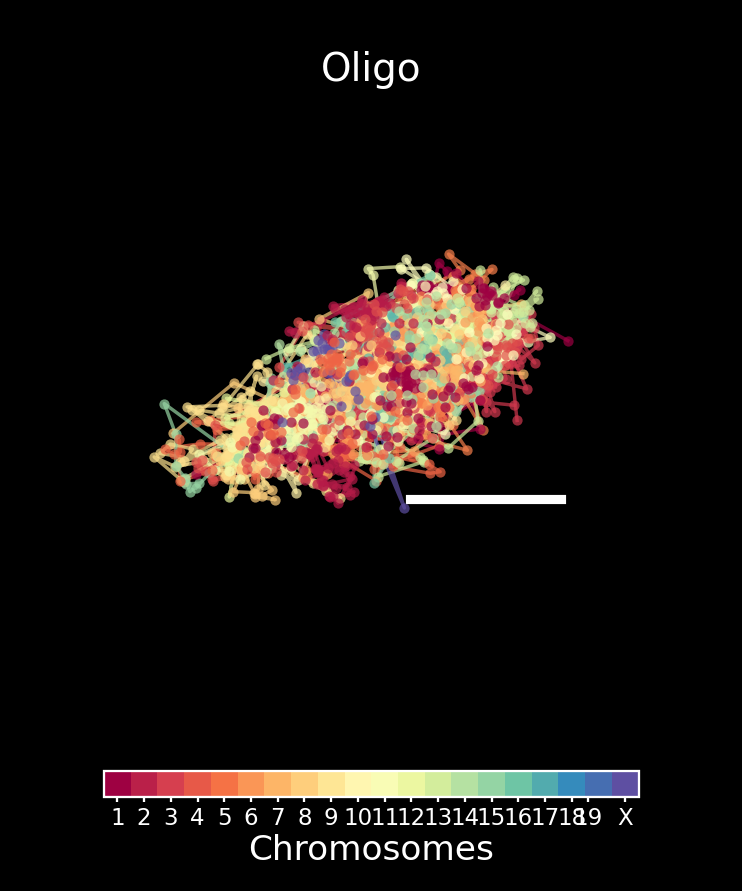

1.0471975511965976 0.5235987755982988


In [250]:
# select cell
plt.style.use('dark_background')
#plt.style.use('default')

_cell_type = info_dict['celltype']
_cell_fov_id = info_dict['FOV']
_cell_cell_id = info_dict['finalcellID']
_dict = chr_2_zxys

from matplotlib.colors import BoundaryNorm
from matplotlib import animation
plot_animation = False
hide_axes = True
add_refBar = True
refBar_len = 5 # in um
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
_chr_2_color = {_key:cmap((sort_chr(_key)-1)/22) for _key in sorted(_dict.keys(), key = lambda v:sort_chr(v))}

plot_radius = 6

marker_size = 5
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width*1.2), dpi=figure_dpi)

ax3d = fig.add_subplot(111, projection='3d', azim=60, elev=30)
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)
# turn off axes if needed
if hide_axes:
    ax3d.set_axis_off()
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"{_chr}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
ax3d.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
# title
ax3d.set_title(f"{_cell_type}" ,fontsize=_font_size+1, pad=0)
# colorbar
bounds = [sort_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_chr(v))), fontsize=_font_size)

cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                    width=_ticklabel_width, length=_ticklabel_size/2,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

# save
fig_basename = f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_fov_{_cell_fov_id}_cell_{_cell_cell_id}"
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(exampleCell_figure_folder, fig_basename+".gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # add ref
    if add_refBar:
        # convert to degree, which matches numpy cos and sin
        _azim = (ax3d.azim%360) / 180 * np.pi 
        _elev = (ax3d.elev%360) / 180 * np.pi
        print(_azim, _elev)
        # start coordinate for colorbar
        _bar_starts = np.array([-0.99, # z, draw to the bottom
                                -np.sin(_azim), # x, y, extension goes through 0,0
                                np.cos(_azim), 
                                ]) * plot_radius
        # ongoing vector for colorbar:
        _bar_vector = np.array([0,
                                np.sin(_azim),
                                -np.cos(_azim),
                                ]) * refBar_len
        # therefore, end of colorbar
        _bar_ends = _bar_starts + _bar_vector
        #print(_bar_starts, _bar_ends)
        _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                              [_bar_starts[2], _bar_ends[2]], 
                              [_bar_starts[0], _bar_ends[0]], 
                              color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                              linewidth=2)

    # save pdf and png
    fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".pdf"),
                transparent=False, bbox_inches='tight', pad_inches=0)
    fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".png"),
                transparent=False, bbox_inches='tight', pad_inches=0)
fig.show()
        

In [ ]:
# select cell
plt.style.use('dark_background')
#plt.style.use('default')

_cell_type = info_dict['celltype']
_cell_fov_id = info_dict['FOV']
_cell_cell_id = info_dict['finalcellID']
_dict = chr_2_zxys

#_sel_chr = '2'

for _sel_chr in _dict.keys():

    if len(_dict[_sel_chr]) == 1:
        _homolog_2_color = {0:cmap(1/2)}
    else:
        _homolog_2_color = {_i:cmap((_i) / (len(_dict[_sel_chr])-1) ) 
                            for _i in range(len(_dict[_sel_chr]))}


    from matplotlib.colors import BoundaryNorm
    from matplotlib import animation
    plot_animation = False
    hide_axes = True
    add_refBar = True
    refBar_len = 5 # in um
    angle = 3

    _centered_dict = Centering_Chr2ZxysListDict(_dict)
    plot_radius = 6

    marker_size = 5
    marker_alpha = 1

    depthshade=False
    fig = plt.figure(figsize=(figure_width, figure_width*1.2), dpi=figure_dpi)

    ax3d = fig.add_subplot(111, projection='3d', azim=60, elev=30)
    ax3d.set_facecolor(background_color)
    fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)
    # turn off axes if needed
    if hide_axes:
        ax3d.set_axis_off()
    # turn off grid if needed
    ax3d.grid(False)
    ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    # all spots as ref
    merged_zxys, merged_cids, merged_hids = Merge_Chr2ZxysList(_centered_dict)
    merged_zxys = merged_zxys/1000
    _valid_inds = (np.isnan(merged_zxys).sum(1) == 0)
    _sc = ax3d.scatter(merged_zxys[_valid_inds,1], merged_zxys[_valid_inds,2], merged_zxys[_valid_inds,0],
                       color='Grey', 
                       s=marker_size-1, depthshade=depthshade, 
                       alpha=0.15,
                       linewidth=0, label=f"h_{_ihomo}")

    # scatter plot
    _zxys_list = _centered_dict[_sel_chr]/1000
    for _ihomo, _zxys in enumerate(_zxys_list):
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_homolog_2_color[_ihomo], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"h_{_ihomo}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_homolog_2_color[_ihomo], linewidth=0.75, alpha=marker_alpha)

    ax3d.tick_params('both', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

    # axes limits
    ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
    ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
    ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
    # axes ticks
    ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
    ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
    ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
    # axes labels
    ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
    ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
    ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
    # title
    ax3d.set_title(f"{_cell_type}: chr{_sel_chr}" ,fontsize=_font_size+1, pad=0)
    # colorbar
    if len(_dict[_sel_chr]) == 1:
        bounds = [-1,0]
    else:
        bounds = list(np.arange(len(_dict[_sel_chr])+1 ))
    #bounds.append(np.max(bounds)+1)
    bounds = np.sort(bounds)
    norm = BoundaryNorm(bounds, cmap.N)
    cbar_shrink = 0.8
    m = cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                        ticks=bounds[:-1]+0.5,
                        boundaries=bounds,
                        shrink=cbar_shrink)
    cbar.set_label('Homologs', fontsize=_font_size, labelpad=1,)
    cbar.ax.set_xticklabels(np.arange(len(_dict[_sel_chr])), fontsize=_font_size)
    cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                        width=_ticklabel_width, length=_ticklabel_size/2,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

    # save
    fig_basename = f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_fov_{_cell_fov_id}_cell_{_cell_cell_id}_chr_{_sel_chr}"
    # animation
    if plot_animation:
        def rotate3D(angle):
             ax3d.view_init(azim=angle)
        ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
        ani.save(os.path.join(exampleCell_figure_folder, fig_basename+".gif"), 
                 writer=animation.PillowWriter(fps=30), )
    else:
        # add ref
        if add_refBar:
            # convert to degree, which matches numpy cos and sin
            _azim = (ax3d.azim%360) / 180 * np.pi 
            _elev = (ax3d.elev%360) / 180 * np.pi
            print(_azim, _elev)
            # start coordinate for colorbar
            _bar_starts = np.array([-0.99, # z, draw to the bottom
                                    -np.sin(_azim), # x, y, extension goes through 0,0
                                    np.cos(_azim), 
                                    ]) * plot_radius
            # ongoing vector for colorbar:
            _bar_vector = np.array([0,
                                    np.sin(_azim),
                                    -np.cos(_azim),
                                    ]) * refBar_len
            # therefore, end of colorbar
            _bar_ends = _bar_starts + _bar_vector
            #print(_bar_starts, _bar_ends)
            _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                                  [_bar_starts[2], _bar_ends[2]], 
                                  [_bar_starts[0], _bar_ends[0]], 
                                  color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                                  linewidth=2)

        # save pdf and png
        fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".pdf"),
                    transparent=False, bbox_inches='tight', pad_inches=0)
        fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".png"),
                    transparent=False, bbox_inches='tight', pad_inches=0)
    fig.show()

## 2D projection

In [ ]:
cmap.N

In [267]:
bounds

array([0.5, 1.5, 2.5])